<a href="https://colab.research.google.com/github/ZFR0/Progetto_PADI/blob/main/Progetto_PADI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predizione della probabilità di sopravvivenza durante un'apocalisse zombie

**Programmazione di Applicazioni Data Intensive**

Gabriel Stira
https://github.com/ZFR0/Progetto_PADI/blob/main/Progetto_PADI.ipynb

In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In questo progetto si analizza un dataset fittizio ambientato in un contesto di apocalisse zombie. Il dataset contiene informazioni sulle caratteristiche degli individui sopravvissuti (o meno) nel tempo e dinamiche ambientali/sociali (accesso a rifugi, armi, risorse, dimensione del gruppo).

In [534]:
dataset = pd.read_csv("zombie_survival_dataset.csv", sep=",")

# Esplorazione e preparazione dati

In [443]:
dataset.head()

,age,gender,pre_existing_conditions,location,occupation,survival_experience,agility,physical_strength,group_size,shelter_access,resources_access,weapon_possession,stress_resistance,days_since_outbreak,survived
0,47,male,hypertension,Desert,Doctor,0.575,0.629,0.898,1,0.214,0.126,True,42.98,328,0.012657
1,48,female,chronic_pain,Industrial,Teacher,0.480,0.385,0.525,3,0.164,0.367,False,46.00,177,0.002144
2,40,male,diabetes,Urban,Doctor,0.574,0.642,0.788,2,0.313,0.474,False,57.36,328,0.004872
3,23,male,none,Rural,Hunter,0.522,1.000,0.970,4,0.655,0.223,True,49.40,322,0.194779
4,53,female,"sleep_apnea, hypertension",Mountain,Farmer,0.508,0.491,0.658,1,0.661,0.244,False,33.70,55,0.036291


In [444]:
dataset.tail()

,age,gender,pre_existing_conditions,location,occupation,survival_experience,agility,physical_strength,group_size,shelter_access,resources_access,weapon_possession,stress_resistance,days_since_outbreak,survived
5995,34,male,"obesity, hypertension",Coastal,Farmer,0.421,0.668,0.735,2,0.431,0.260,False,60.08,330,0.002859
5996,49,female,none,Forest,Nurse,0.384,0.637,0.890,1,0.599,0.239,False,44.78,41,0.171959
5997,50,female,arthritis,Shelter,Firefighter,0.712,0.497,0.728,6,0.999,0.426,False,45.49,273,0.048834
5998,35,female,hypertension,Mountain,Mechanic,0.447,0.881,0.868,1,0.618,0.157,True,57.36,360,0.077827
5999,55,female,none,Forest,Lawyer,0.345,0.535,0.782,1,0.447,0.300,False,27.04,117,0.007097


In [445]:
len(dataset)

6000

Come è possibile notare, il dataset contiene 6000 istanze ed è organizzato in 15 colonne. Segue ora la descrizione delle features:
1.   *age*  : Età dell'individuo. Variabile numerica intera.
2.   *gender*  : Sesso dell'individuo: Variabile categorica (male/female).
3.   *pre_existing_conditions*  : Presenza di condizioni mediche pregresse (es. diabete, asma, malattie cardiache). Variabile multicategoria.
4.   *location*  : Zona geografica in cui si trova l'individuo (es. "Urban", "Desert", "Shelter"). Variabile categorica.
5.   *occupation*  : Professione dell'individuo prima dell'apocalisse (es. "Doctor", "Teacher", "Engineer"). Variabile categorica.
6.   *survival_experience*  : Livello di esperienza nell'affrontare situazioni di sopravvivenza. Variabile numerica continua.
7.   *agility*  : Capacità dell’individuo di muoversi rapidamente ed evitare pericoli. Variabile numerica continua.
8.   *physical_strength*  : Forza fisica generale dell’individuo. Variabile numerica continua.
9.   *group_size*  : Numero di persone nel gruppo con cui l’individuo si trova. Variabile numerica intera.
10.  *shelter_access*  : Accesso a un rifugio sicuro. Variabile numerica continua.
11.  *resources_access*  : Accesso a risorse essenziali come cibo, acqua e medicine. Variabile numerica continua.
12.  *weapon_possession*  : Possesso di armi per difendersi dai pericoli. Variabile booleana.
13.  *stress_resistance*  : Capacità di resistere allo stress in situazioni estreme. Variabile numerica continua (tra 0 e 100).
14.  *days_since_outbreak*  : Numero di giorni trascorsi dall’inizio dell’apocalisse per l'individuo. Variabile numerica intera.

La variabile target è *survived* e rappresenta la probabilità che l’individuo sia ancora vivo al giorno days_since_outbreak. Variabile numerica continua tra 0 e 1.



In [446]:
dataset.describe()

,age,survival_experience,agility,physical_strength,group_size,shelter_access,resources_access,stress_resistance,days_since_outbreak,survived
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,39.754833,0.471752,0.595523,0.693480,3.831333,0.485574,0.312186,47.611440,181.339833,0.130194
std,15.024680,0.208413,0.236089,0.204043,3.589480,0.238510,0.126645,16.053375,105.780393,0.196701
min,1.000000,0.000000,0.000000,0.067000,1.000000,0.058000,0.040000,5.760000,1.000000,0.000106
25%,30.000000,0.337000,0.416750,0.553000,1.000000,0.280000,0.210000,35.267500,91.000000,0.004380
50%,40.000000,0.454000,0.615000,0.705000,3.000000,0.471000,0.317000,50.955000,180.000000,0.030322
75%,50.000000,0.615000,0.779000,0.853000,5.000000,0.631000,0.407000,59.840000,274.000000,0.178728
max,95.000000,1.000000,1.000000,1.000000,30.000000,1.000000,0.778000,91.130000,365.000000,0.975927


Si rilevano media, deviazione standard, valore massimo e minimo e percentili per ognuna delle features.
Dal momento che la variabile target *survived* è una variabile continua che assume valori tra 0 e 1 (probabilità), il problema è un problema di **regressione**.

## Valori nulli

In [447]:
dataset.isna().sum()

,0
age,0
gender,0
pre_existing_conditions,0
location,0
occupation,0
survival_experience,0
agility,0
physical_strength,0
group_size,0
shelter_access,0


Non sono presenti valori nulli nel dataset.

## Valori anomali

Spesso si rimuovono i dati agli estremi perché potrebbero distorcere la stima dei modelli oppure essere dati rumorosi, errori di misura o casi poco rappresentativi. Si potrebbe valutare di effettuare una rimozione dei dati oltre un certo percentile (es. al 2.5% e al 97.5%) per aiutare a migliorare la robustezza e la generalizzazione dei modelli. Dal momento che nel caso preso in studio i valori studiati sono realistici e talvolta è possibile rappresentino condizioni estreme ma possibili (es. persone molto anziane o con caratteristiche particolari che influenzano la sopravvivenza), eliminarli potrebbe causare la perdita di informazioni importanti. Al fine di avere un modello che sappia predire anche i casi “estremi” e dal momento che non sembrano essere presenti valori ragionevolmente improbabili causati da errori di inserimento si decide per adesso di lasciare i dati così come sono.

## Distribuzione variabili

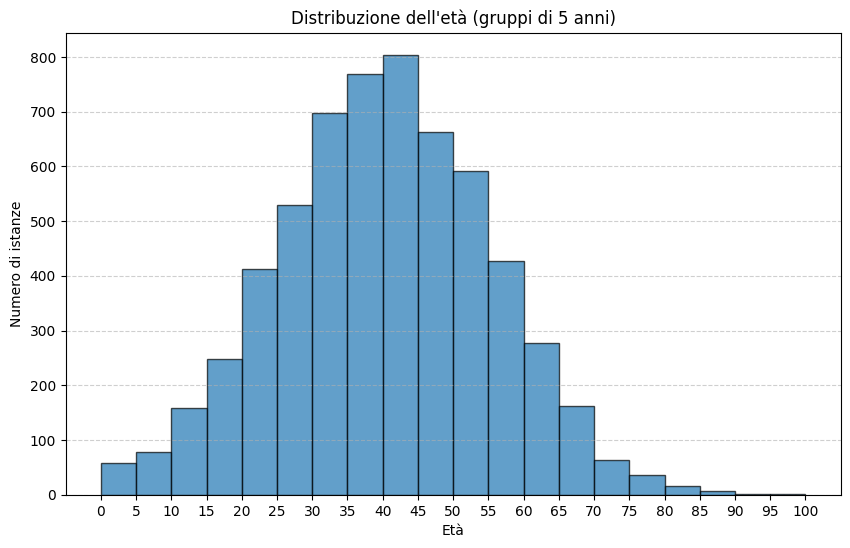

In [448]:
plt.figure(figsize=(10,6))
bins = range(0, 105, 5)
plt.hist(dataset['age'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribuzione dell\'età (gruppi di 5 anni)')
plt.xlabel('Età')
plt.ylabel('Numero di istanze')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

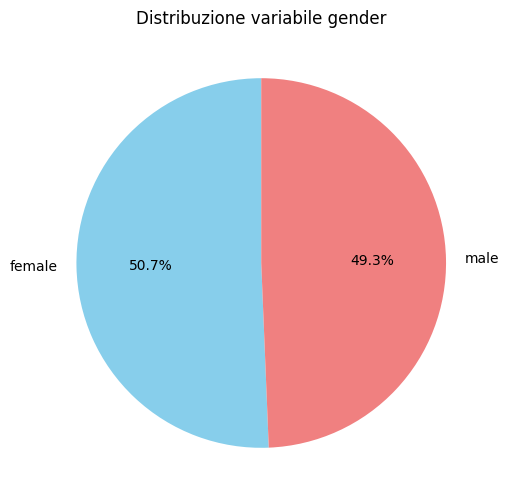

In [449]:
gender_counts = dataset['gender'].value_counts()

plt.figure(figsize=(6,6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribuzione variabile gender')
plt.ylabel('')
plt.show()

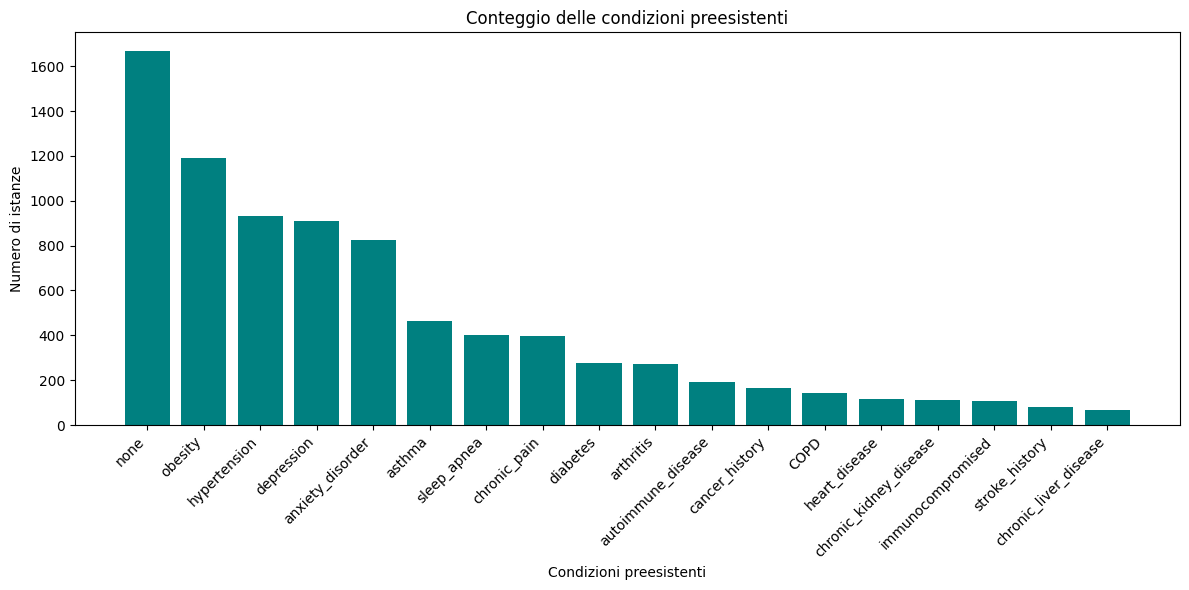

In [535]:
conditions_series = dataset['pre_existing_conditions']

all_conditions = []
for cond_list in conditions_series:
    conditions = [c.strip() for c in cond_list.split(',')]
    all_conditions.extend(conditions)

condition_counts = Counter(all_conditions)

condition_counts = dict(sorted(condition_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12,6))
plt.bar(condition_counts.keys(), condition_counts.values(), color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Condizioni preesistenti')
plt.ylabel('Numero di istanze')
plt.title('Conteggio delle condizioni preesistenti')
plt.tight_layout()
plt.show()

Essendo *pre_existing_conditions* una variabile multicategorica, vengono rappresentati i conteggi di ogni singola istanza di apparizione di una condizione e non tutte le combinazioni possibili presenti (anche perchè non sarebbe utile ai fini dell'esplorazione dei dati). Possiamo comunque contare quante volte appaiono 0, 1, 2, etc... condizioni per gli individui del dataset per avere un'idea della distribuzione in termini di quantità di condizioni.

In [536]:
def count_conditions(cond_str):
    cond_str = cond_str.strip().lower()
    if cond_str == 'none' or cond_str == '':
        return 0
    else:
        return len([c.strip() for c in cond_str.split(',')])

num_conditions_per_individual = dataset['pre_existing_conditions'].apply(count_conditions)

counts = Counter(num_conditions_per_individual)

counts = dict(sorted(counts.items()))

print("Numero condizioni : Numero di individui")
for cond_num, freq in counts.items():
    print(f"{cond_num} : {freq}")

Numero condizioni : Numero di individui
0 : 1668
1 : 2532
2 : 1350
3 : 385
4 : 59
5 : 6


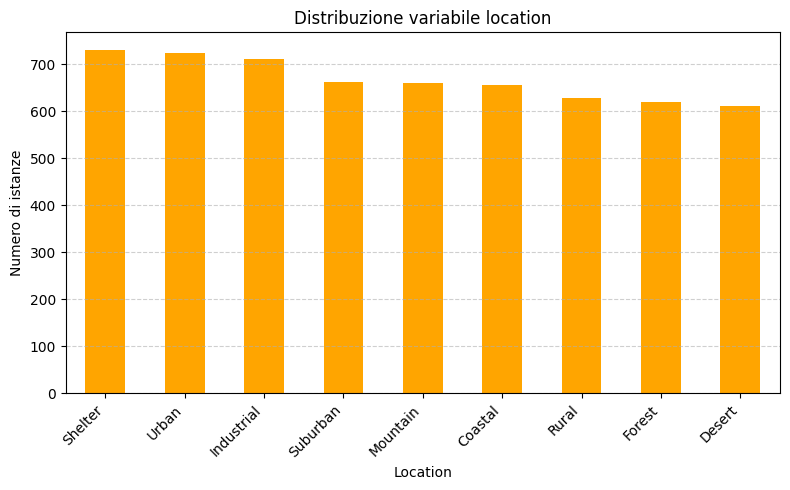

In [537]:
location_counts = dataset['location'].value_counts()

plt.figure(figsize=(8,5))
location_counts.plot(kind='bar', color='orange')
plt.title('Distribuzione variabile location')
plt.xlabel('Location')
plt.ylabel('Numero di istanze')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

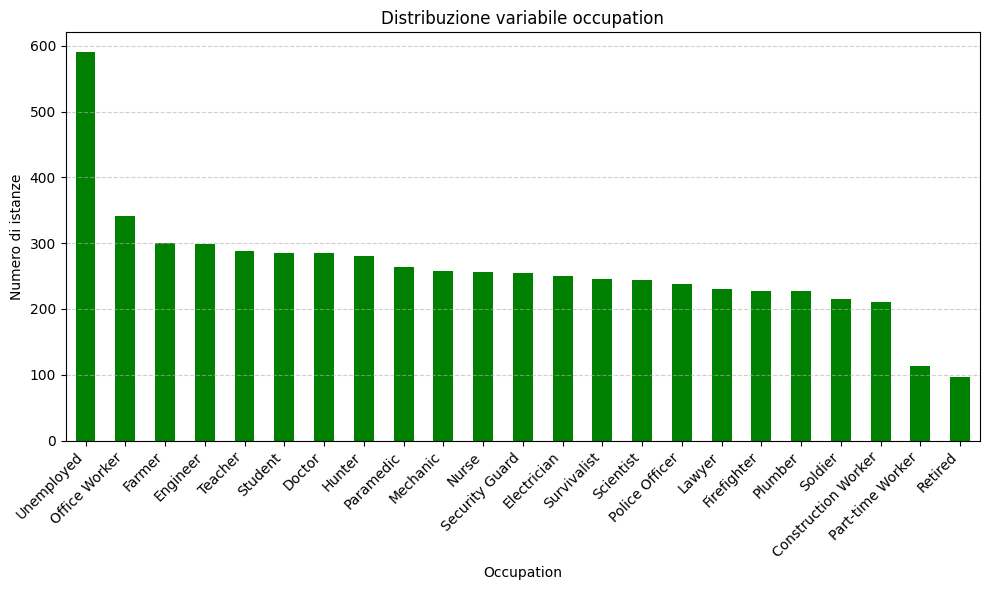

In [452]:
occupation_counts = dataset['occupation'].value_counts()

plt.figure(figsize=(10,6))
occupation_counts.plot(kind='bar', color='green')
plt.title('Distribuzione variabile occupation')
plt.xlabel('Occupation')
plt.ylabel('Numero di istanze')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

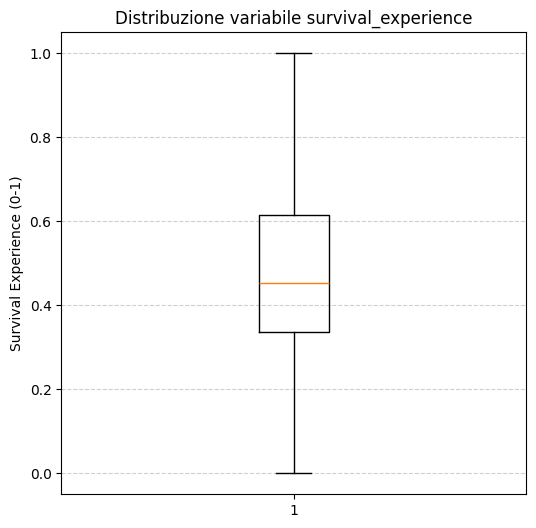

In [453]:
plt.figure(figsize=(6,6))
plt.boxplot(dataset['survival_experience'], vert=True)
plt.title('Distribuzione variabile survival_experience')
plt.ylabel('Survival Experience (0-1)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

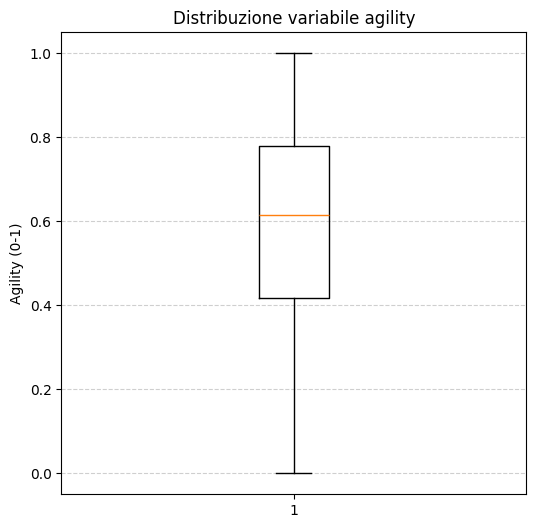

In [454]:
plt.figure(figsize=(6,6))
plt.boxplot(dataset['agility'], vert=True)
plt.title('Distribuzione variabile agility')
plt.ylabel('Agility (0-1)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

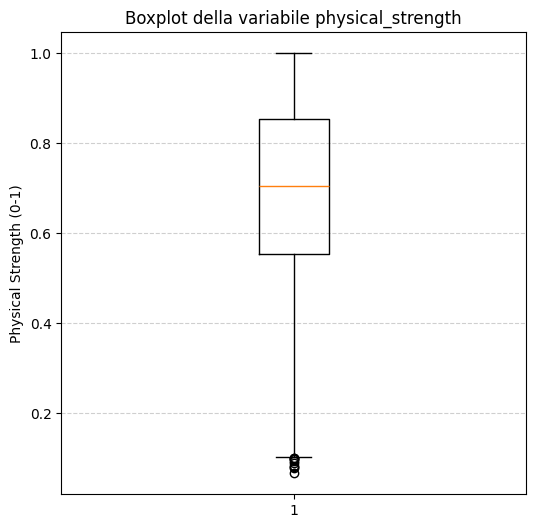

In [455]:
plt.figure(figsize=(6,6))
plt.boxplot(dataset['physical_strength'], vert=True)
plt.title('Boxplot della variabile physical_strength')
plt.ylabel('Physical Strength (0-1)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

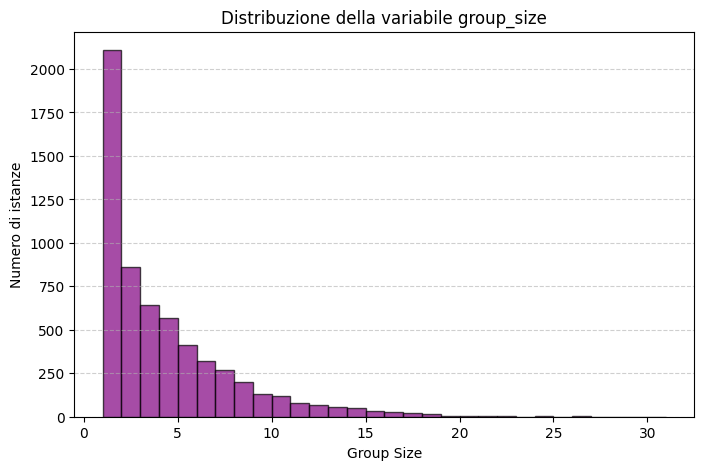

In [456]:
plt.figure(figsize=(8,5))
plt.hist(dataset['group_size'], bins=range(int(dataset['group_size'].min()), int(dataset['group_size'].max()) + 2),
         color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della variabile group_size')
plt.xlabel('Group Size')
plt.ylabel('Numero di istanze')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

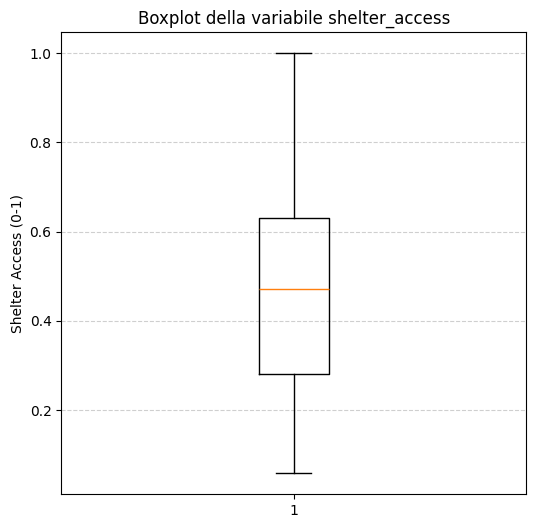

In [457]:
plt.figure(figsize=(6,6))
plt.boxplot(dataset['shelter_access'], vert=True)
plt.title('Boxplot della variabile shelter_access')
plt.ylabel('Shelter Access (0-1)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

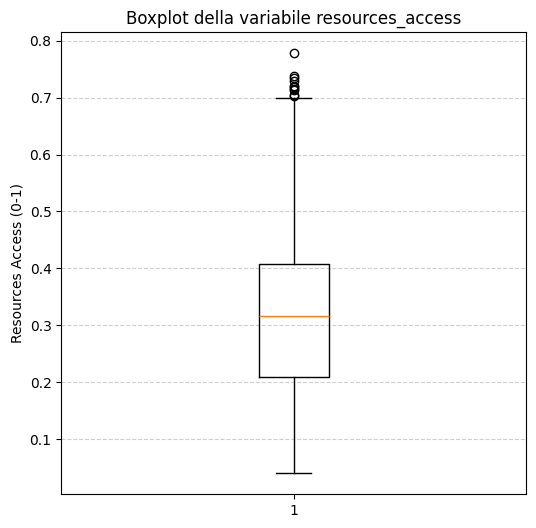

In [458]:
plt.figure(figsize=(6,6))
plt.boxplot(dataset['resources_access'], vert=True)
plt.title('Boxplot della variabile resources_access')
plt.ylabel('Resources Access (0-1)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

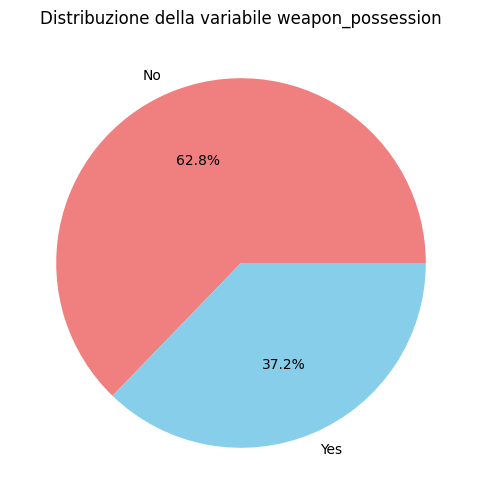

In [459]:
weapon_counts = dataset['weapon_possession'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(weapon_counts, labels=weapon_counts.index.map({True: 'Yes', False: 'No'}), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribuzione della variabile weapon_possession')
plt.show()

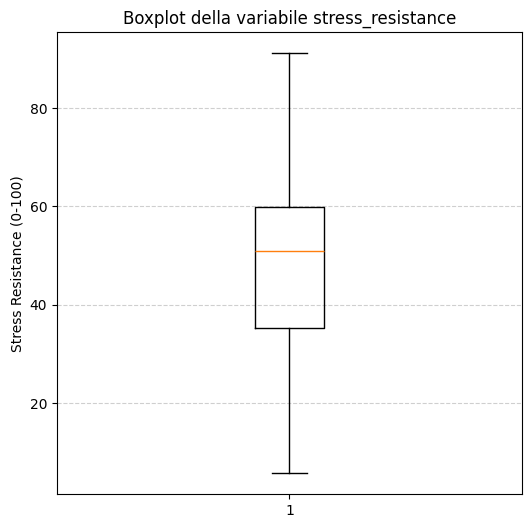

In [460]:
plt.figure(figsize=(6,6))
plt.boxplot(dataset['stress_resistance'], vert=True)
plt.title('Boxplot della variabile stress_resistance')
plt.ylabel('Stress Resistance (0-100)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

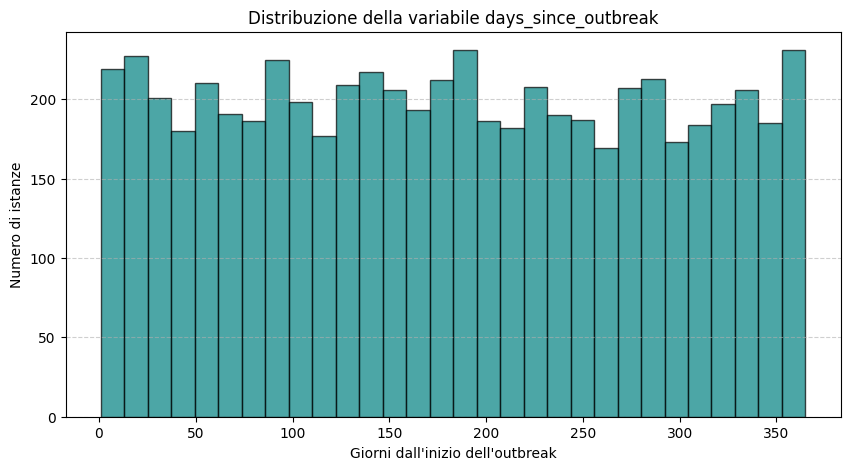

In [461]:
plt.figure(figsize=(10,5))
plt.hist(dataset['days_since_outbreak'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della variabile days_since_outbreak')
plt.xlabel('Giorni dall\'inizio dell\'outbreak')
plt.ylabel('Numero di istanze')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Osservando i grafici si notano alcune peculiarità: alcune variabili presentano dati bilanciati nella distribuzione (ad esempio presenza di individui nelle zone geografiche o giorni dall'inizio dell'epidemia); altre hanno distribuzione gaussiana come l'età, altre ancora sembrano avere una qualche forma di dipendenza da altre variabili (il fatto di essere uno studente sembra essere correlato all'età ad esempio). *days_since_outbreak* sembra a sua volta essere distribuita equamente tra tutte le istanze: ciò significa che il dataset contiene un numero di istanze più o meno simile associato ad ognuno dei giorni dell'anno.

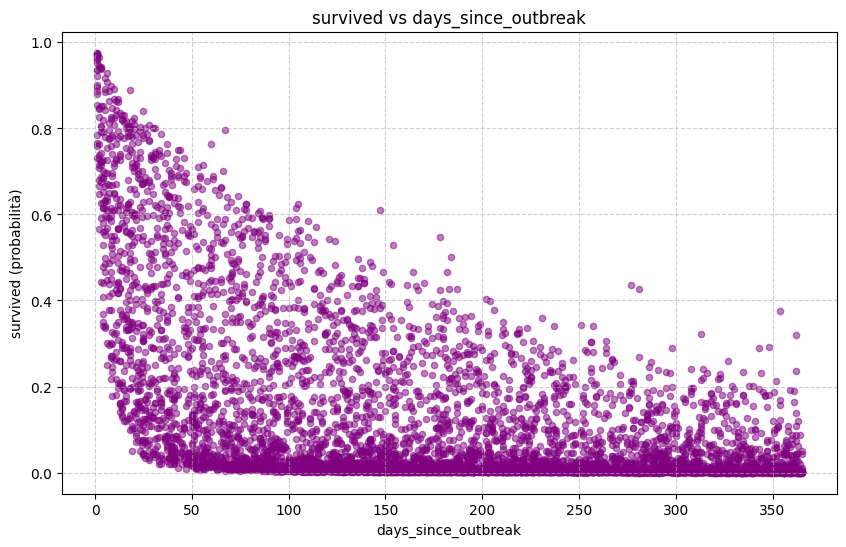

In [462]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['days_since_outbreak'], dataset['survived'], alpha=0.5, color='purple', s=20)
plt.title('survived vs days_since_outbreak')
plt.xlabel('days_since_outbreak')
plt.ylabel('survived (probabilità)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Si osserva con facilità come la variabile target *survived* risulti essere influenzata da quanti giorni sono passati dall'inizio dell'epidemia (rappresentato dalla variabile *days_since_outbreak*). Se nei primi giorni la probabilità di sopravvivenza è molto alta per quasi tutti gli individui, si nota che con il passare del tempo essa cala drasticamente. Si nota inoltre che a parità di *days_since_outbreak*, individui diversi hanno diverse probabilità di sopravvivenza, influenzate ognuna dalle diverse caratteristiche che descrivono gli individui stessi (ci si aspetta ad esempio che un individuo più agile abbia maggiore probabilità di sopravvivenza). La maggior parte delle istanze del dataset sembra dopo pochi giorni piombare a valori di probabilità di sopravvivenza vicini a 0.

In [463]:
import seaborn as sns

def plot_correlation_matrix(dataset):
    # Seleziona solo le colonne numeriche
    numeric_data = dataset.select_dtypes(include=['float64', 'int64', 'bool'])

    # Calcola la matrice di correlazione (Pearson)
    corr = numeric_data.corr()

    # Crea la maschera per la triangolare superiore
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Imposta la dimensione della figura
    plt.figure(figsize=(12, 10))

    # Crea una palette diverging (blu-bianco-rosso)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Disegna la heatmap
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1.0,
        vmin=-1.0,
        center=0,
        annot=True,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title("Matrice di Correlazione delle Variabili Numeriche", fontsize=16)
    plt.tight_layout()
    plt.show()

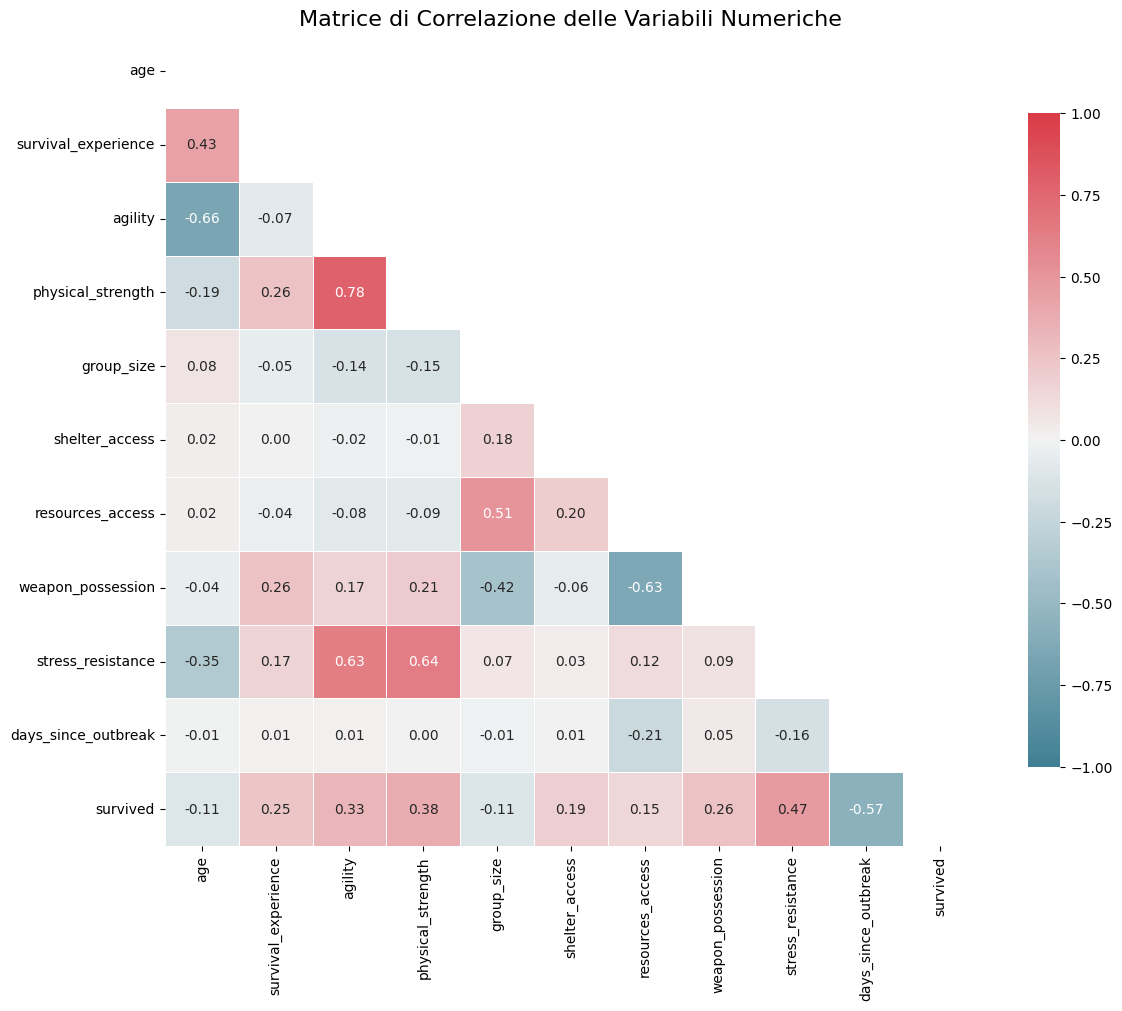

In [464]:
plot_correlation_matrix(dataset)

Si evidenzia qui la matrice di correlazione tra tutte le variabili numeriche che calcola e mostra le correlazioni Pearson tra varie coppie di variabili. Si notano immediatamente diverse peculiarità:
*   *physical_strength* e *agility* sono fortemente correlate tra loro (ed effettivamente ha senso che queste due capacità tendano a crescere insieme)
*   *stress_resistance* ha alti valori di correlazione con *physical_strength* e *agility*: ha senso pensare che valori più di resistenza mentale influenzano la resistenza fisica e viceversa.
*   *resource_access* e *group_size* sono correlate (positivamente) anch'esse e quindi è ragionevole pensare che più il numero di persone cresce e più risorse si hanno a disposizione (maggiore organizzazione delle risorse).
*   *survived* e *days_since_outbreak* hanno moderata correlazione negativa: ha ovviamente senso pensare che le probabilità di sopravvivenza diminuiscano con il passare del tempo.
*   *weapon_possession* e *group_size* hanno una moderata correlazione negativa: questo fa pensare che chi si muove in gruppi più piccoli sia più propenso ad essere armato e chi faccia parte di gruppi più grandi lo sia di meno.



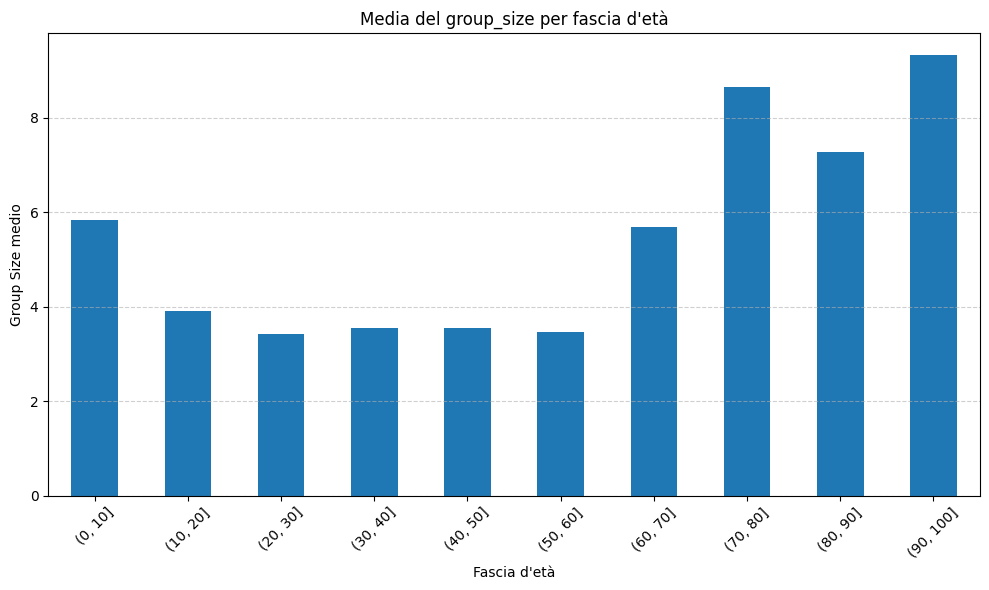

In [465]:
dataset['age_bin'] = pd.cut(dataset['age'], bins=[0,10,20,30,40,50,60,70,80,90,100])

grouped = dataset.groupby('age_bin', observed=True)['group_size'].mean()

grouped.plot(kind='bar', figsize=(10,6))
plt.title("Media del group_size per fascia d'età")
plt.ylabel("Group Size medio")
plt.xlabel("Fascia d'età")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dato che il coefficiente di Pearson non cattura relazioni non lineari, si evidenziano alcune particolarità non direttamente osservabili attraverso la matrice di correlazione. Il numero di persone facenti parte dello stesso gruppo sembra essere leggermente più elevato nel caso di bambini e molto più elevato nel caso di anziani: questo ha senso se si pensa che in condizioni di sopravvivenza estrema chi ha limitata autonomia o maggior bisogno di protezione e supporto (bambini e anziani) tenderà a cercare altre persone.

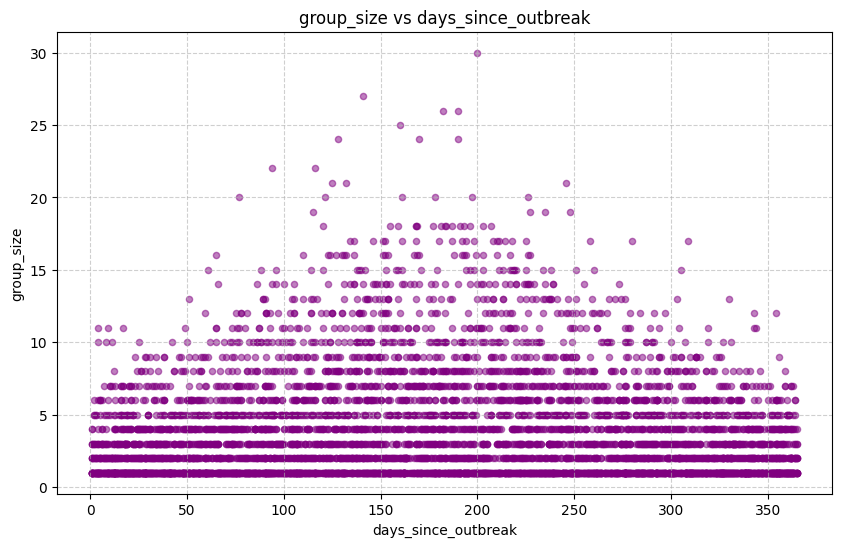

In [530]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['days_since_outbreak'], dataset['group_size'], alpha=0.5, color='purple', s=20)
plt.title('group_size vs days_since_outbreak')
plt.xlabel('days_since_outbreak')
plt.ylabel('group_size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

È interessante osservare un andamento parabolico della *group_size* in relazione all’aumento di *days_since_breakout* per una parte limitata delle istanze. Questo fenomeno può essere spiegato considerando che, subito dopo lo scoppio dell’epidemia, gli individui tendono a raggrupparsi per aumentare le proprie probabilità di sopravvivenza. Con il passare dei giorni, invece, a causa della mortalità all’interno dei gruppi, la dimensione media tende nuovamente a diminuire.

In [466]:
def encode_and_correlate(dataset, column_to_encode):
    # One-hot encoding della colonna categorica specificata
    encoded = pd.get_dummies(dataset[column_to_encode], prefix=column_to_encode)

    dataset_encoded = pd.concat([dataset.drop(columns=[column_to_encode]), encoded], axis=1)

    numeric_data = dataset_encoded.select_dtypes(include=['float64', 'int64', 'bool'])

    # Calcola la matrice di correlazione
    correlation_matrix = numeric_data.corr()

    encoded_columns = [col for col in correlation_matrix.columns if col.startswith(f"{column_to_encode}_")]

    # Estrai solo le righe delle colonne codificate
    correlation_subset = correlation_matrix.loc[encoded_columns]

    return correlation_subset

In [467]:
corr_location = encode_and_correlate(dataset, "location")

In [468]:
print(corr_location['survived'].sort_values(ascending=False))

location_Rural         0.119788
location_Shelter       0.116304
location_Mountain      0.077894
location_Forest       -0.020739
location_Desert       -0.038649
location_Suburban     -0.044411
location_Coastal      -0.046454
location_Industrial   -0.076077
location_Urban        -0.086417
Name: survived, dtype: float64


In [469]:
print(corr_location['group_size'].sort_values(ascending=False))

location_Shelter       0.382496
location_Urban         0.318793
location_Suburban      0.082978
location_Industrial   -0.005040
location_Coastal      -0.021034
location_Rural        -0.097454
location_Forest       -0.181147
location_Mountain     -0.260560
location_Desert       -0.265379
Name: group_size, dtype: float64


In [470]:
print(corr_location['resources_access'].sort_values(ascending=False))

location_Shelter       0.529143
location_Urban         0.370089
location_Industrial    0.207168
location_Coastal       0.058840
location_Suburban      0.053395
location_Forest       -0.096891
location_Rural        -0.252193
location_Mountain     -0.405891
location_Desert       -0.535616
Name: resources_access, dtype: float64


SI osserva come la zona geografica in cui si trova l'individuo influenzi variabili come *resource_access* e *group_size*. Si osserva anche una piccola correlazione con *survived*.

In [471]:
corr_occupation = encode_and_correlate(dataset, "occupation")

In [472]:
print(corr_occupation['survival_experience'].sort_values(ascending=False))

occupation_Survivalist            0.380149
occupation_Soldier                0.288777
occupation_Hunter                 0.274984
occupation_Police Officer         0.253006
occupation_Firefighter            0.187474
occupation_Security Guard         0.145477
occupation_Paramedic              0.143865
occupation_Doctor                 0.086628
occupation_Farmer                 0.031980
occupation_Construction Worker    0.020924
occupation_Nurse                  0.002511
occupation_Mechanic              -0.035284
occupation_Plumber               -0.048808
occupation_Electrician           -0.050637
occupation_Engineer              -0.054316
occupation_Retired               -0.071633
occupation_Lawyer                -0.093667
occupation_Scientist             -0.094969
occupation_Teacher               -0.110811
occupation_Part-time Worker      -0.135593
occupation_Office Worker         -0.147391
occupation_Student               -0.387538
occupation_Unemployed            -0.395563
Name: survi

In [473]:
print(corr_occupation['weapon_possession'].sort_values(ascending=False))

occupation_Hunter                 0.203902
occupation_Police Officer         0.179088
occupation_Soldier                0.176111
occupation_Security Guard         0.148781
occupation_Firefighter            0.121936
occupation_Construction Worker    0.087813
occupation_Lawyer                -0.008976
occupation_Plumber               -0.024430
occupation_Mechanic              -0.026715
occupation_Electrician           -0.029474
occupation_Part-time Worker      -0.033955
occupation_Nurse                 -0.036364
occupation_Office Worker         -0.037176
occupation_Farmer                -0.041178
occupation_Teacher               -0.045532
occupation_Scientist             -0.053847
occupation_Engineer              -0.053883
occupation_Survivalist           -0.060148
occupation_Doctor                -0.060157
occupation_Paramedic             -0.064375
occupation_Student               -0.090953
occupation_Retired               -0.093263
occupation_Unemployed            -0.106497
Name: weapo

In [474]:
print(corr_occupation['survived'].sort_values(ascending=False))

occupation_Police Officer         0.150148
occupation_Firefighter            0.131917
occupation_Hunter                 0.121047
occupation_Soldier                0.114942
occupation_Security Guard         0.108522
occupation_Construction Worker    0.047040
occupation_Lawyer                 0.013790
occupation_Survivalist            0.008238
occupation_Mechanic              -0.000146
occupation_Paramedic             -0.002102
occupation_Nurse                 -0.002767
occupation_Plumber               -0.018948
occupation_Part-time Worker      -0.021994
occupation_Doctor                -0.024384
occupation_Farmer                -0.028704
occupation_Engineer              -0.030440
occupation_Scientist             -0.038298
occupation_Electrician           -0.043108
occupation_Retired               -0.047136
occupation_Teacher               -0.052678
occupation_Office Worker         -0.070224
occupation_Student               -0.099194
occupation_Unemployed            -0.133391
Name: survi

Si osserva analogamente come l'occupazione dell'individuo influenzi variabili come *survival_experience* o *weapon_possession*. Stessa cosa accade anche per *survived*.

In [475]:
from sklearn.preprocessing import MultiLabelBinarizer

def encode_and_correlate_multilabel(dataset, column_to_encode, separator=','):
    # Conversione valori della colonna in liste (es. "a,b" -> ["a", "b"])
    multilabel_series = dataset[column_to_encode].fillna('').apply(lambda x: [item.strip() for item in x.split(separator) if item.strip()])

    # Multi-hot encoding
    mlb = MultiLabelBinarizer()
    encoded = pd.DataFrame(mlb.fit_transform(multilabel_series),
                           columns=[f"{column_to_encode}_{cls}" for cls in mlb.classes_],
                           index=dataset.index)

    # Unione al dataset e rimozione colonna originale
    dataset_encoded = pd.concat([dataset.drop(columns=[column_to_encode]), encoded], axis=1)

    # Calcolo correlazioni solo sulle colonne numeriche
    numeric_data = dataset_encoded.select_dtypes(include=['float64', 'int64', 'bool'])
    correlation_matrix = numeric_data.corr()

    # Ritorna righe delle colonne codificate
    encoded_columns = encoded.columns
    correlation_subset = correlation_matrix.loc[encoded_columns]

    return correlation_subset

In [476]:
correlation_pre_existing = encode_and_correlate_multilabel(dataset, "pre_existing_conditions")

In [477]:
print(correlation_pre_existing['survived'].sort_values(ascending=False))

pre_existing_conditions_none                      0.135396
pre_existing_conditions_hypertension             -0.006502
pre_existing_conditions_depression               -0.015254
pre_existing_conditions_immunocompromised        -0.015727
pre_existing_conditions_anxiety_disorder         -0.020488
pre_existing_conditions_autoimmune_disease       -0.023965
pre_existing_conditions_sleep_apnea              -0.025866
pre_existing_conditions_cancer_history           -0.028218
pre_existing_conditions_stroke_history           -0.031217
pre_existing_conditions_chronic_liver_disease    -0.045057
pre_existing_conditions_diabetes                 -0.051735
pre_existing_conditions_heart_disease            -0.057136
pre_existing_conditions_asthma                   -0.057563
pre_existing_conditions_COPD                     -0.058753
pre_existing_conditions_obesity                  -0.060192
pre_existing_conditions_chronic_kidney_disease   -0.073096
pre_existing_conditions_chronic_pain             -0.0876

Si osserva come la presenza di condizione pregresse influenzi a sua volta, seppur di poco, la probabilità di sopravvivenza.

In [478]:
from scipy.stats import ttest_ind

# Seleziona tutte le colonne numeriche tranne 'gender'
numerical_features = dataset.select_dtypes(include='number').columns

# t-test per ogni variabile numerica
results = {}
for feature in numerical_features:
    group1 = dataset[dataset['gender'] == 'male'][feature].dropna()
    group2 = dataset[dataset['gender'] == 'female'][feature].dropna()
    if len(group1) > 1 and len(group2) > 1:
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        results[feature] = pval

sorted_results = dict(sorted(results.items(), key=lambda item: item[1]))

for feature, pval in sorted_results.items():
    print(f"{feature}: p-value = {pval:.4f}")

physical_strength: p-value = 0.0000
agility: p-value = 0.0008
age: p-value = 0.2129
resources_access: p-value = 0.4045
group_size: p-value = 0.4612
days_since_outbreak: p-value = 0.5085
stress_resistance: p-value = 0.5270
shelter_access: p-value = 0.6171
survival_experience: p-value = 0.9616
survived: p-value = 0.9794


Quasi nessuna delle variabili numeriche mostra una differenza statisticamente significativa tra i generi (considerando la soglia tipica p < 0.05). *physical_strenght* e *agility* hanno però valore ≈0 e quindi significativo.

Questo significa che nel dataset le uniche variabili numeriche che differiscono in modo rilevante tra maschi e femmine sono *physical_strenght* e *agility*.

In [479]:
from scipy import stats

# Funzione per calcolare eta squared da t-stat
def eta_squared_from_t(t_stat, n1, n2):
    df = n1 + n2 - 2
    eta_sq = (t_stat ** 2) / (t_stat ** 2 + df)
    return eta_sq

numerical_features = dataset.select_dtypes(include='number').columns

# Calcola t-test e η²
results = {}
for feature in numerical_features:
    group1 = dataset[dataset['gender'] == 'male'][feature].dropna()
    group2 = dataset[dataset['gender'] == 'female'][feature].dropna()

    if len(group1) > 1 and len(group2) > 1:
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        eta_sq = eta_squared_from_t(stat, len(group1), len(group2))
        results[feature] = (pval, eta_sq)

# Ordina per p-value crescente
sorted_results = dict(sorted(results.items(), key=lambda item: item[1][0]))

for feature, (pval, eta_sq) in sorted_results.items():
    print(f"{feature}: p-value = {pval:.4f}, eta² = {eta_sq:.4f}")

physical_strength: p-value = 0.0000, eta² = 0.0029
agility: p-value = 0.0008, eta² = 0.0019
age: p-value = 0.2129, eta² = 0.0003
resources_access: p-value = 0.4045, eta² = 0.0001
group_size: p-value = 0.4612, eta² = 0.0001
days_since_outbreak: p-value = 0.5085, eta² = 0.0001
stress_resistance: p-value = 0.5270, eta² = 0.0001
shelter_access: p-value = 0.6171, eta² = 0.0000
survival_experience: p-value = 0.9616, eta² = 0.0000
survived: p-value = 0.9794, eta² = 0.0000


Gli eta² sono molto piccoli (0.0029 e 0.0019), cioè l’effetto della variabile *gender* su *physical_strength* e *agility* è praticamente trascurabile dal punto di vista dell’impatto reale. Considerando questo ed il fatto che *gender*
non abbia differenze significative o effetti rilevanti su tutte le altre variabili, è ragionevole rimuovere la variabile *gender* dal dataset senza perdere informazioni importanti.

In [480]:
dataset = dataset.drop(columns=['gender'])

## Features engineering

Si nota come ci sia un alto valore di correlazione positiva tra le variabili *agility* e *physical_strength*. Si nota inoltre come entrambe abbiano valori di correlazione con tutte le altre variabili molto simili tra di loro: le due variabili stanno esprimendo quasi la stessa informazione e tenere entrambe potrebbe non portare vantaggi significativi. Si crea quindi una nuova variabile combinata *physical_ability* come (*physical_strength* + *agility*) / 2:

In [481]:
dataset["physical_ability"] = (dataset["agility"] + dataset["physical_strength"]) / 2

Si rimuovono quindi le due variabili *physical_strength* e *agility*.



In [482]:
dataset.drop(columns=["agility", "physical_strength"], inplace=True)
dataset = dataset[["age", "pre_existing_conditions", "location", "occupation",	"survival_experience", "physical_ability", "group_size", "shelter_access", "resources_access", "weapon_possession", "stress_resistance", "days_since_outbreak",	"survived"]]

In [483]:
dataset.head()

,age,pre_existing_conditions,location,occupation,survival_experience,physical_ability,group_size,shelter_access,resources_access,weapon_possession,stress_resistance,days_since_outbreak,survived
0,47,hypertension,Desert,Doctor,0.575,0.7635,1,0.214,0.126,True,42.98,328,0.012657
1,48,chronic_pain,Industrial,Teacher,0.480,0.4550,3,0.164,0.367,False,46.00,177,0.002144
2,40,diabetes,Urban,Doctor,0.574,0.7150,2,0.313,0.474,False,57.36,328,0.004872
3,23,none,Rural,Hunter,0.522,0.9850,4,0.655,0.223,True,49.40,322,0.194779
4,53,"sleep_apnea, hypertension",Mountain,Farmer,0.508,0.5745,1,0.661,0.244,False,33.70,55,0.036291


In [484]:
features = ['age', 'pre_existing_conditions', 'location', 'occupation', 'survival_experience', 'physical_ability', 'group_size', 'shelter_access', 'resources_access', 'weapon_possession', 'stress_resistance', 'days_since_outbreak']
target = ['survived']

In [485]:
dataset['pre_existing_conditions'] = dataset['pre_existing_conditions'].str.lower().str.split(',\s*')

from itertools import chain

all_conditions = list(set(chain.from_iterable(dataset['pre_existing_conditions'])))

# Crea le colonne binarie
for condition in all_conditions:
    dataset[f'cond_{condition}'] = dataset['pre_existing_conditions'].apply(lambda conds: int(condition in conds))

dataset.drop(columns=['pre_existing_conditions'], inplace=True)

In [486]:
dataset = pd.get_dummies(dataset, columns=['location', 'occupation'], prefix=['location', 'occupation'])

In [487]:
dataset.head()

,age,survival_experience,physical_ability,group_size,shelter_access,resources_access,weapon_possession,stress_resistance,days_since_outbreak,survived,...,occupation_Plumber,occupation_Police Officer,occupation_Retired,occupation_Scientist,occupation_Security Guard,occupation_Soldier,occupation_Student,occupation_Survivalist,occupation_Teacher,occupation_Unemployed
0,47,0.575,0.7635,1,0.214,0.126,True,42.98,328,0.012657,...,False,False,False,False,False,False,False,False,False,False
1,48,0.480,0.4550,3,0.164,0.367,False,46.00,177,0.002144,...,False,False,False,False,False,False,False,False,True,False
2,40,0.574,0.7150,2,0.313,0.474,False,57.36,328,0.004872,...,False,False,False,False,False,False,False,False,False,False
3,23,0.522,0.9850,4,0.655,0.223,True,49.40,322,0.194779,...,False,False,False,False,False,False,False,False,False,False
4,53,0.508,0.5745,1,0.661,0.244,False,33.70,55,0.036291,...,False,False,False,False,False,False,False,False,False,False


*location*: 9 categorie → 9 colonne (one-hot)

*occupation*: 23 categorie → 23 colonne (one-hot)

*pre_existing_conditions*: 17 categorie → 17 colonne (multi-hot)

Aggiungendole alle altre feature numeriche (es. age, survival_experience, ecc.), si arriva a 60 colonne totali.
Si potrebbe considerare di ridurre il numero di colonne one-hot / multi-hot eliminando o fondendo le categorie più rare o simili. Osservando i grafici sulla distribuzione dei dati per ogni classe si nota però che sia per *location*, *occupation* che per *pre_existing_conditions*, non ci sono classi talmente "rare" da considerare di ridurne il numero senza perdita di informazioni.

In [488]:
X = dataset.drop('survived', axis=1)  # Tutte le feature, tolgo la colonna target
y = dataset['survived']               # Variabile target

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=43)

#Random Forest

In [489]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# normalizzazione + random forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor(random_state=43))
])

# griglia di parametri da esplorare
param_grid = {
    'rfr__n_estimators': [100, 200, 300],
    'rfr__max_depth': [5, 10, 15, None],
    'rfr__min_samples_split': [2, 5, 10],
    'rfr__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV con 5-fold cross validation
rfr_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

rfr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr',
                                        RandomForestRegressor(random_state=43))]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [5, 10, 15, None],
                         'rfr__min_samples_leaf': [1, 2, 4],
                         'rfr__min_samples_split': [2, 5, 10],
                         'rfr__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [490]:
print("Best parameters:", rfr_grid_search.best_params_)

Best parameters: {'rfr__max_depth': None, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 300}


In [491]:
y_pred = rfr_grid_search.predict(X_val)
best_train_score = -rfr_grid_search.best_score_
cv_mse_rfr = best_train_score
print(f'Best CV MSE: {cv_mse_rfr:.6f}')

Best CV MSE: 0.002194


In [492]:
mse_rfr = mean_squared_error(y_val, y_pred)
mae_rfr = mean_absolute_error(y_val, y_pred)
r2_rfr = r2_score(y_val, y_pred)

print("MSE:", mse_rfr)
print("MAE:", mae_rfr)
print("R²:", r2_rfr)

MSE: 0.0019065749503734575
MAE: 0.02539723664590264
R²: 0.9514764806010225


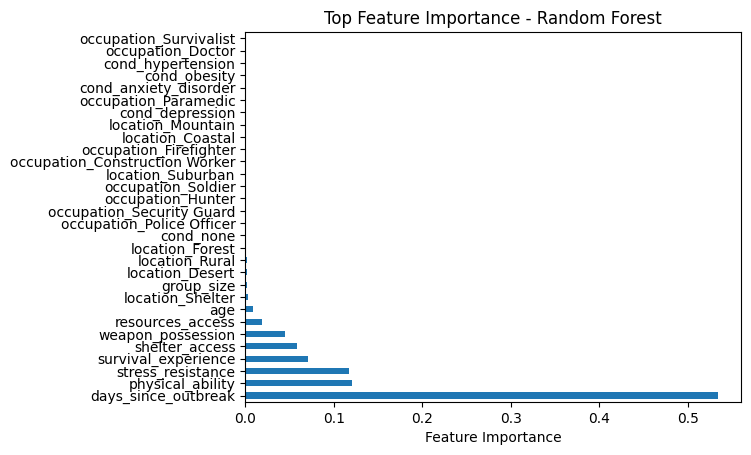

In [493]:
# Importanza delle feature
# grid_search.best_estimator_ è la pipeline, il secondo step è 'rfr'
rfr = rfr_grid_search.best_estimator_.named_steps['rfr']

# X_train è un DataFrame, usiamo le sue colonne per indicizzare
feature_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)

feature_importances.nlargest(30).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top Feature Importance - Random Forest')
plt.show()

Si nota come *days_since_outbreak* sia la variabile più informativa e discriminante per predire la variabile target *survived*
Poche altre feature, con importanze intorno a 0.1, contribuiscono comunque, ma in misura minore, mentre la maggior parte delle feature ha importanza trascurabile. Il fatto che *days_since_outbreak* sia la feature dominante ha perfettamente senso nel contesto del problema (la quantità di giorni dall’inizio dell’epidemia influenza ovviamente molto la sopravvivenza).



In [494]:
# Prendi le 12 feature più importanti
top_12_features = feature_importances.nlargest(12).index.tolist()

# Genera nuovo dataset con solo queste feature
X_train_top12 = X_train[top_12_features]
X_val_top12 = X_val[top_12_features]

In [495]:
pipeline_top12 = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor(random_state=43))
])

rfr_grid_search_top12 = GridSearchCV(
    estimator=pipeline_top12,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

rfr_grid_search_top12.fit(X_train_top12, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr',
                                        RandomForestRegressor(random_state=43))]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [5, 10, 15, None],
                         'rfr__min_samples_leaf': [1, 2, 4],
                         'rfr__min_samples_split': [2, 5, 10],
                         'rfr__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [496]:
print("Best parameters:", rfr_grid_search_top12.best_params_)

Best parameters: {'rfr__max_depth': None, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 300}


In [497]:
y_pred = rfr_grid_search_top12.predict(X_val_top12)
best_train_score = -rfr_grid_search_top12.best_score_
print(f'Best CV MSE: {best_train_score:.6f}')

Best CV MSE: 0.002160


In [498]:
print("MSE:", mean_squared_error(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("R²:", r2_score(y_val, y_pred))

MSE: 0.0018818223009675835
MAE: 0.025155185991984068
R²: 0.9521064509378229


Si è provato a rimuovere tutte le features con feature importance trovata molto vicina allo zero (48 delle 60 totali) nel tentativo di, rieffettuando l'addestramento e test con lo stesso modello su un dataset di dimensioni molto minori, ridurre il tempo di computazione. I risultati ottenuti mantengono valori di metriche di valutazione molto simili, addirittura poco migliori con il dataset ridotto; purtroppo il tempo di computazione è rimasto anch'esso praticamente uguale. Questo è imputabile probabilmente al fatto che le 48 colonne rimosse sono one-hot e quindi molte di esse contengono quasi tutti 0.
Questo rende i dati sparsi, e quindi veloci da gestire anche se numerosi (implementazione efficente di sklearn).

# XGBoost

In [499]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=43))
])

param_grid = {
    'xgb__eta': [0.01, 0.1, 0.3],
    'xgb__max_depth': [3, 6, 10],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__n_estimators': [100, 200],
    'xgb__alpha': [0, 0.001]
}

xgb_grid_search = GridSearchCV(
    pipeline, param_grid,
    cv=5, n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=Non...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=43, ...))]),
             n_jobs=-1,
             param_grid={'xgb__alpha': [0, 0.001],
                         'xgb__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgb__eta': [0.01, 0.1, 0.3],
                         'xgb__max_depth': [3, 6, 10],
                         'xgb__min_child_weight': [1, 3, 5],
                         'xgb__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [500]:
print('Best parameters:', xgb_grid_search.best_params_)

Best parameters: {'xgb__alpha': 0, 'xgb__colsample_bytree': 0.8, 'xgb__eta': 0.1, 'xgb__max_depth': 6, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 200}


In [501]:
y_pred = xgb_grid_search.predict(X_val)
best_train_score = -xgb_grid_search.best_score_
cv_mse_xgb = best_train_score
print(f'Best CV MSE: {cv_mse_xgb:.6f}')

Best CV MSE: 0.001369


In [502]:
mse_xgb = mean_squared_error(y_val, y_pred)
mae_xgb = mean_absolute_error(y_val, y_pred)
r2_xgb = r2_score(y_val, y_pred)

print("MSE:", mse_xgb)
print("MAE:", mae_xgb)
print("R²:", r2_xgb)

MSE: 0.0011617918870238605
MAE: 0.0204416933187286
R²: 0.9704316732177067


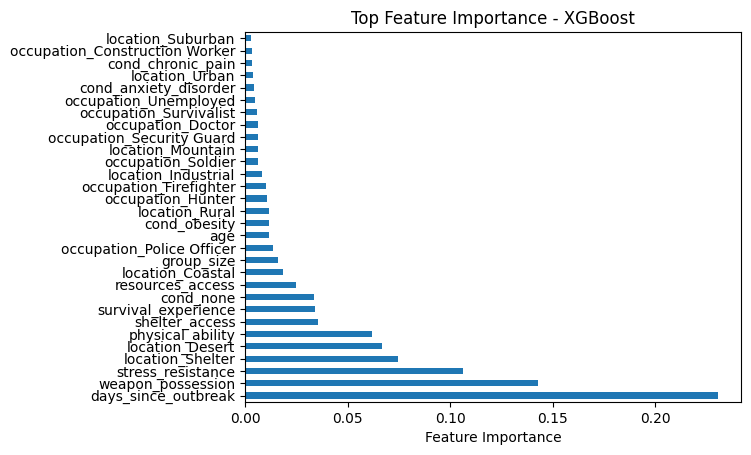

In [503]:
xgb_model = xgb_grid_search.best_estimator_.named_steps['xgb']

feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

feature_importances.nlargest(30).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top Feature Importance - XGBoost')
plt.show()

*days_since_outbreak* rimane la feature più rilevante al fine di predirre *survived*, ma si nota come XGBoost assegni importanza minore alla feature più rilevante e maggiore a tutte le altre. Questo è probabilmente riconducibile al fatto che dato che XGBoost include parametri di regolarizzazione che tendono a smussare e distribuire l'importanza su più feature per evitare overfitting e quindi questo può portare a importanze più bilanciate tra più variabili. Inoltre XGBoost può modellare interazioni più complesse tra variabili e quindi "premiare" più feature che lavorano insieme, che come si è visto sono presenti in numero non esiguo.

# Ridge regression

In [504]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=43))
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10, 100],  # regolarizzazione
    'ridge__solver': ['auto', 'svd', 'cholesky'],  # opzioni di solver
}

ridge_grid_search = GridSearchCV(
    pipeline, param_grid,
    cv=5, n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

ridge_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=43))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.01, 0.1, 1.0, 10, 100],
                         'ridge__solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_squared_error', verbose=1)

In [505]:
print('Best parameters:', ridge_grid_search.best_params_)

Best parameters: {'ridge__alpha': 1.0, 'ridge__solver': 'svd'}


In [506]:
y_pred = ridge_grid_search.predict(X_val)
best_train_score = -ridge_grid_search.best_score_
cv_mse_ridge = best_train_score
print(f'Best CV MSE: {cv_mse_ridge:.6f}')

Best CV MSE: 0.011568


In [507]:
mse_ridge = mean_squared_error(y_val, y_pred)
mae_ridge = mean_absolute_error(y_val, y_pred)
r2_ridge = r2_score(y_val, y_pred)

print("MSE:", mse_ridge)
print("MAE:", mae_ridge)
print("R²:", r2_ridge)

MSE: 0.011958761277013044
MAE: 0.08515208929009371
R²: 0.6956420807379122


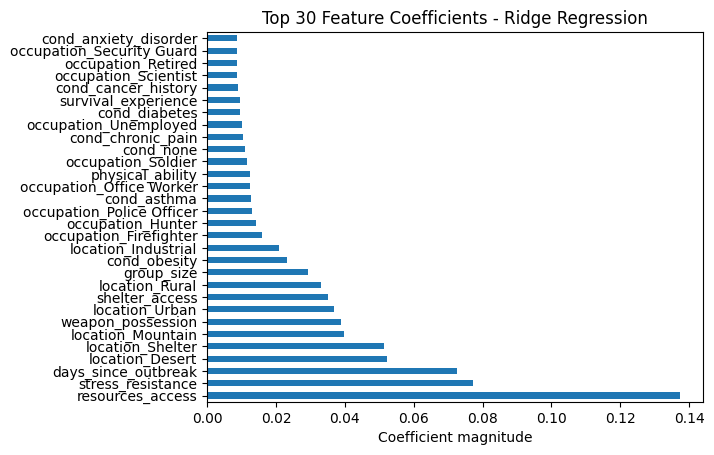

In [508]:
ridge_model = ridge_grid_search.best_estimator_.named_steps['ridge']
coefficients = pd.Series(ridge_model.coef_, index=X_train.columns)

coefficients.abs().nlargest(30).plot(kind='barh')
plt.xlabel('Coefficient magnitude')
plt.title('Top 30 Feature Coefficients - Ridge Regression')
plt.show()

La variabile a cui Ridge sembra dare più importanza è *resources_access*. Si evidenzia quindi la differenza tra modelli ad albero che possono catturare interazioni complesse e relazioni non lineari tra feature e target e che preferiscono quindi la variabile *days_since_outbreak* che domina sulle altre, e un modello lineare con regolarizzazione come Ridge che non coglie le stesse interazioni e le rappresentano in modo più "spalmato" tra diverse variabili, e quindi l’importanza di days_since_outbreak appare più "diluita".

## (Ridge + Nested Cross Validation)

In [509]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10, 100],
    'ridge__solver': ['auto', 'svd', 'cholesky']
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=43)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=43)

ridge_nestedcv_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=inner_cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

nested_scores = cross_val_score(
    ridge_nestedcv_grid_search, X, y, cv=outer_cv,
    scoring='neg_mean_squared_error', n_jobs=-1
)

print(f'Nested CV MSE: {-nested_scores.mean():.6f} ± {nested_scores.std():.6f}')

Nested CV MSE: 0.011641 ± 0.000282


Per il modello Ridge si è eseguita anche una nested cross-validation per ottenere una stima meno ottimistica delle sue prestazioni. Sono stati ottenuti valori di MSE molto simili sia per validazione standard con GridSearchCV che per nested cross validation, indice del fatto che la selezione degli iperparametri è stata stabile e non ha portato a overfitting. Per motivi temporali/computazionali, la nested cross-validation è stata applicata solo al modello Ridge, data la sua rapidità di addestramento. Per gli altri modelli, è stata utilizzata una normale cross-validation con GridSearchCV per la selezione degli iperparametri.

#ElasticNet

In [510]:
from sklearn.linear_model import ElasticNet

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10000))
])

param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9]  # 0 = Ridge, 1 = Lasso
}

elasticnet_grid_search = GridSearchCV(
    pipeline, param_grid,
    cv=5, n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

elasticnet_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0],
                         'elasticnet__l1_ratio': [0.1, 0.5, 0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [511]:
print('Best parameters:', elasticnet_grid_search.best_params_)

Best parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.1}


In [512]:
y_pred = elasticnet_grid_search.predict(X_val)
best_train_score = -elasticnet_grid_search.best_score_
cv_mse_elasticnet = best_train_score
print(f'Best CV MSE: {cv_mse_elasticnet:.6f}')

Best CV MSE: 0.011835


In [513]:
mse_elasticnet = mean_squared_error(y_val, y_pred)
mae_elasticnet = mean_absolute_error(y_val, y_pred)
r2_elasticnet = r2_score(y_val, y_pred)

print("MSE:", mse_elasticnet)
print("MAE:", mae_elasticnet)
print("R²:", r2_elasticnet)

MSE: 0.012179867595694652
MAE: 0.08525135072375933
R²: 0.6900147872807723


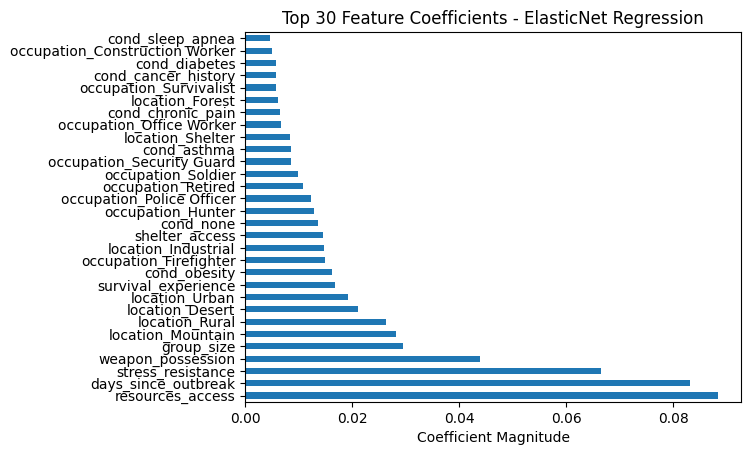

In [514]:
elastic_model = elasticnet_grid_search.best_estimator_.named_steps['elasticnet']

coefficients = pd.Series(elastic_model.coef_, index=X_train.columns)

coefficients.abs().nlargest(30).plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.title('Top 30 Feature Coefficients - ElasticNet Regression')
plt.show()

Come osservato anche nel modello Ridge, ElasticNet attribuisce un'elevata importanza alla variabile resources_access. Questo è coerente con la natura del modello: con l1_ratio = 0.1, ElasticNet si comporta in modo molto simile a Ridge, incorporando solo una modesta componente di regolarizzazione L1 (tipica del Lasso).
Di conseguenza, l'importanza delle feature risulta distribuita su più variabili piuttosto che concentrata, riflettendo l'effetto della penalizzazione L2 predominante.
Tuttavia, entrambi i modelli, essendo lineari, faticano a catturare in modo efficace relazioni non lineari nei dati. Questo è evidente dai risultati metrici e dal confronto con modelli più flessibili come XGBoost o Random Forest.

# Support Vector Regression

In [516]:
from sklearn.svm import SVR

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__gamma': ['scale', 0.1]
}

svr_grid_search = GridSearchCV(
    pipeline, param_grid,
    cv=5, n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

svr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__epsilon': [0.01, 0.1, 0.5],
                         'svr__gamma': ['scale', 0.1],
                         'svr__kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=1)

In [518]:
print('Best parameters:', svr_grid_search.best_params_)

Best parameters: {'svr__C': 1, 'svr__epsilon': 0.01, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}


In [519]:
y_pred = svr_grid_search.predict(X_val)
best_train_score = -svr_grid_search.best_score_
cv_mse_svr = best_train_score
print(f'Best CV MSE: {cv_mse_svr:.6f}')

Best CV MSE: 0.004690


In [520]:
mse_svr = mean_squared_error(y_val, y_pred)
mae_svr = mean_absolute_error(y_val, y_pred)
r2_svr = r2_score(y_val, y_pred)

print("MSE:", mse_svr)
print("MAE:", mae_svr)
print("R²:", r2_svr)

MSE: 0.004604832967046294
MAE: 0.04224957095677447
R²: 0.8828041343133379


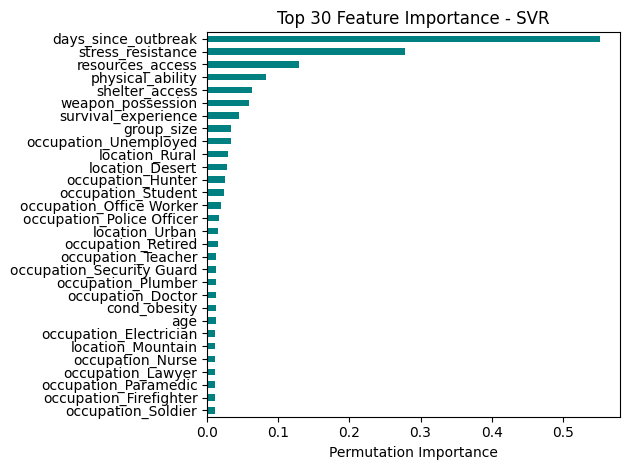

In [522]:
from sklearn.inspection import permutation_importance

best_pipeline = svr_grid_search.best_estimator_

result = permutation_importance(best_pipeline, X_val, y_val,
                                n_repeats=10, random_state=42, n_jobs=-1)

feature_importances = pd.Series(result.importances_mean, index=X_val.columns)

feature_importances.nlargest(30).plot(kind='barh', color='teal')
plt.xlabel('Permutation Importance')
plt.title('Top 30 Feature Importance - SVR')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Si osserva come per i modelli ensemble il fatto che *days_since_outbreak* sia la feature dominante al fine della predizione di *survived*. Il modello si affida molto ad essa, considera di meno poche altre variabili che hanno una correlazione moderata col target, mentre sembra considerare veramente molto poco la maggior parte delle variabili restanti, che non forniscono miglioramenti predittivi e vengono trascurate.

# Neural Net

In [523]:
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=43, max_iter=1000))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01]
}

mlp_grid_search = GridSearchCV(
    pipeline, param_grid,
    cv=5, n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

mlp_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPRegressor(max_iter=1000,
                                                     random_state=43))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001, 0.01],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
                         'mlp__learning_rate_init': [0.001, 0.01]},
             scoring='neg_mean_squared_error', verbose=1)

In [524]:
print('Best parameters:', mlp_grid_search.best_params_)

Best parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.01}


In [525]:
y_pred = mlp_grid_search.predict(X_val)
best_train_score = -mlp_grid_search.best_score_
cv_mse_mlp = best_train_score
print(f'Best CV MSE: {cv_mse_mlp:.6f}')

Best CV MSE: 0.002585


In [526]:
mse_mlp = mean_squared_error(y_val, y_pred)
mae_mlp = mean_absolute_error(y_val, y_pred)
r2_mlp = r2_score(y_val, y_pred)

print("MSE:", mse_mlp)
print("MAE:", mae_mlp)
print("R²:", r2_mlp)

MSE: 0.00235368168169072
MAE: 0.03149324112460772
R²: 0.9400973359488612


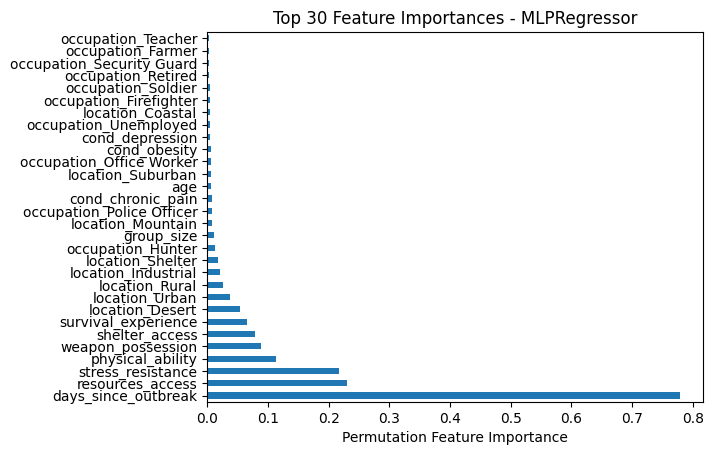

In [527]:
mlp_model = mlp_grid_search.best_estimator_

result = permutation_importance(
    mlp_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1
)

importances = pd.Series(result.importances_mean, index=X_val.columns)
importances.nlargest(30).plot(kind='barh')
plt.xlabel('Permutation Feature Importance')
plt.title('Top 30 Feature Importances - MLPRegressor')
plt.show()

Le reti neurali sono modelli molto flessibili e adattativi in grado di apprendere pattern non lineari complessi. Ma se il dataset contiene alcune feature estremamente informative come in questo caso *days_since_outbreak*, allora la rete neurale baserà gran parte delle sue previsioni su di esse. Come per gli altri modelli più complessi analizzati prima, *days_since_outbreak* si riconferma avere una relazione molto forte e diretta col target. Poche altre variabili come *resources_access* e *stress_resistance*, contengono informazioni relativamente utili e aiutano a modellare casi particolari o eccezioni, dove *days_since_outbreak* da sola non basta e perciò non vengono trascurate dal modello come accade con la maggior parte delle altre feature presenti.


# Comparazione dei modelli

In [528]:
data = {
    'Model': ['Ridge', 'XGBoost', 'SVR', 'ElasticNet', 'NeuralNet', 'RandomForest'],
    'CV MSE': [cv_mse_ridge, cv_mse_xgb, cv_mse_svr, cv_mse_elasticnet, cv_mse_mlp, cv_mse_rfr],
    'MSE': [mse_ridge, mse_xgb, mse_svr, mse_elasticnet, mse_mlp, mse_rfr],
    'MAE': [mae_ridge, mae_xgb, mae_svr, mae_elasticnet, mae_mlp, mae_rfr],
    'R2': [r2_ridge, r2_xgb, r2_svr, r2_elasticnet, r2_mlp, r2_rfr]
}

In [529]:
df_results = pd.DataFrame(data)

print(df_results)

          Model    CV MSE       MSE       MAE        R2
0         Ridge  0.011568  0.011959  0.085152  0.695642
1       XGBoost  0.001369  0.001162  0.020442  0.970432
2           SVR  0.004690  0.004605  0.042250  0.882804
3    ElasticNet  0.011835  0.012180  0.085251  0.690015
4     NeuralNet  0.002585  0.002354  0.031493  0.940097
5  RandomForest  0.002194  0.001907  0.025397  0.951476


XGBoost mostra le prestazioni migliori con un errore quadratico medio (MSE) molto basso sia in cross-validation (0.001369) che sul set di validazione (0.001162), accompagnato da un ottimo coefficiente di determinazione 𝑅²=0.97. Questo indica che XGBoost riesce a catturare in modo efficace la complessità e le relazioni presenti nei dati, garantendo alta accuratezza predittiva.

Random Forest e Neural Network dimostrano anch'essi valori molto buoni sia per quanto riguarda MSE sul validation set rispettivamente di 0.001907 e 0.002354, e valori di 𝑅² sopra 0.94; anch’essi hanno una buona capacità di generalizzazione e accuratezza.

SVR raggiunge risultati discreti, posizionandosi tra i modelli più complessi e quelli lineari, con un MSE di circa 0.0046 e un
𝑅² vicino a 0.88. Questo suggerisce che, pur essendo un modello più flessibile rispetto alle regressioni lineari, non è in grado di superare i modelli ensemble nel caso di studio preso in considerazione.

Ridge ed ElasticNet, modelli lineari con regolarizzazione, ottengono prestazioni peggiori rispetto agli altri modelli più complessi, con MSE intorno a 0.012 e 𝑅² attorno a 0.69-0.70. Questo indica che la relazione tra variabili probabilmente non è sufficientemente lineare o semplice, e i modelli lineari faticano a catturarne le interazioni o la non linearità presenti nei dati.

Ulteriori delucidazioni riguardo le metriche di valutazione utilizzate:

CV MSE:	errore quadratico medio calcolato tramite cross validation -> stima di quanto bene il modello generalizza.

MSE: errore quadratico medio sul validation set -> misura quanto in media sbaglia il modello, penalizzando molto gli errori grandi.

MAE: errore assoluto medio -> misura l’errore medio senza penalizzare troppo i valori anomali/fuori scala.

R²:	coefficiente di determinazione -> indica quanto bene il modello spiega la varianza del target (1 = perfetto, 0 = inutile).